<a href="https://colab.research.google.com/github/Coluno/data_rangling_pandas_II/blob/main/exercicio_data_rangling_pandas_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparando Ambiente**

Nesse exercicio irei trabalhar com dados geográficos, demográficos e econômicos do Brasil. irei manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

---
Irei carregar o arquivo estados_bruto.xml conténdo informações sobre estados (nome, sigla e região).


---
Irei carregar o arquivo cidades_bruto.csv conténdo informações demográficas e socioeconomicas das cidades do Brasil.




---



# 1. Data Wrangling

**1.1 Estados**

Irei ultizar o pacote Python **beautifulsoup4** para extrair os dados do arquivo **estados_bruto.xml**. Irei salvar os dados extraidos no arquivo estados_limpo.csv separado por ; .

In [ ]:
from bs4 import BeautifulSoup
import csv

arquivo_fonte = 'estados_bruto.xml'
arquivo_limpo = 'estados_limpo.csv'

#lendo arquivo estados_bruto.xml
with open (arquivo_fonte, 'r',encoding= 'utf-8') as arquivo_xml:
  fonte = BeautifulSoup(arquivo_xml, 'lxml')

#extraindo e escrevendo no arquivo CSV
with open (arquivo_limpo,'w', encoding = 'utf-8') as arquivo_csv:
  escritor_csv = csv.writer(arquivo_csv, delimiter = ';')

  #criando cabeçalho
  escritor_csv.writerow(['estado', 'sigla', 'regiao'])

  #Extraindo dados para cada um dos estados
  for estado in fonte.find_all('estado'):
    nome = estado.find('nome').text
    sigla = estado.find('sigla').text
    regiao = estado.find('regiao').text

    #escrevendo o arquivo CSV
    escritor_csv.writerow([nome, sigla, regiao])

print(f'Dados extraidos e salvo em {arquivo_limpo}')

Dados extraidos e salvo em estados_limpo.csv


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
#print(fonte)

Com isso podemos ler o arquivo de forma ordenada

In [ ]:
NOME_ARQUIVO_DESTINO = 'estados_limpo.csv'

# Lê o arquivo CSV e o imprime
with open(NOME_ARQUIVO_DESTINO, 'r', encoding='utf-8') as arquivo_csv:
  conteudo_csv = arquivo_csv.read()
  print(conteudo_csv)

estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
AMAZONAS;AM;NORTE
BAHIA;BA;NORDESTE
CEARA;CE;NORDESTE
DISTRITO FEDERAL;DF;CENTRO-OESTE
ESPIRITO SANTO;ES;SUDESTE
GOIAS;GO;CENTRO-OESTE
MARANHAO;MA;NORDESTE
MATO GROSSO;MT;CENTRO-OESTE
MATO GROSSO DO SUL;MS;CENTRO-OESTE
PARA;PA;NORTE
PARAIBA;PB;NORDESTE
PARANA;PR;SUL
PERNAMBUCO;PE;NORDESTE
PIAUI;PI;NORDESTE
RIO DE JANEIRO;RJ;SUDESTE
RIO GRANDE DO NORTE;RN;NORDESTE
RIO GRANDE DO SUL;RS;SUL
RONDONIA;RO;NORTE
RORAIMA;RR;NORTE
SANTA CATARINA;SC;SUL
SAO PAULO;SP;SUDESTE
SERGIPE;SE;NORDESTE
TOCANTINS;TO;NORTE
MINAS GERAIS;MG;SUDESTE





---



**1.2 Cidades**

O arquivo `cidades_bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil.Usarei o pacote Python `pandas` para extrair os dados do arquivo `cidades_bruto.xml`.



1.   Irei extrair apenas dados do censo de 2010
2.   Para melhor leitura irei imprimir apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita e salvar em um arquivo **cidades_limpo.csv** separado por ;.



In [ ]:
import pandas as pd

arquivo_cidade_fonte = 'cidades_bruto.csv'
arquivo_cidade_limpo = 'cidades_limpo.csv'

#lê o arquivo cidade_bruto
fonte_df = pd.read_csv(arquivo_cidade_fonte)

#Dados do censo de 2010
fonte_limpa_df = fonte_df[fonte_df['Censo'] == 2010]

#Seleciona apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita
colunas_desejadas = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']
fonte_limpa_df = fonte_limpa_df[colunas_desejadas]

# Salva os dados limpos no arquivo cidades_limpo.csv
fonte_limpa_df.to_csv('cidades_limpo.csv', sep=';', index=False)

print(f'Dados extraídos com sucesso e salvos em {arquivo_cidade_limpo}.')

Dados extraídos com sucesso e salvos em cidades_limpo.csv.


Agora os dados foram limpos conforme nossa escolha

In [ ]:
arquivo_cidade_limpo = 'cidades_limpo.csv'

# Lê o arquivo CSV e o imprime
with open(arquivo_cidade_limpo, 'r', encoding='utf-8') as arquivo_csv:
  conteudo_csv = arquivo_csv.read()
  print('conteudo limpo e salvo em cidades_limpo.csv')

conteudo limpo e salvo em cidades_limpo.csv


In [ ]:
#print(conteudo_csv)



---



# **1.3. Brasil**

Irei utilizar o `pandas` para combinar os dados do arquivo `estados_limpo.csv` com os dados do arquivo `cidades_limpo.csv` em um único dataframe. Porém o criterio dessa seleção: Irei escolher a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Depois irei salvar os dados do dataframe no arquivo `brasil.csv`

Precisa instalar a biblioteca unidecode: pip install unidecode

In [ ]:
from unidecode import unidecode

#função para remover os acentos de alguns estados, evitando erros no dataframe
def remover_acentos(texto):
  return unidecode(texto)

In [ ]:
import pandas as pd

# Leitura dos dataframes dos arquivos CSV
estados_df = pd.read_csv('estados_limpo.csv', delimiter=';')
cidades_df = pd.read_csv('cidades_limpo.csv', delimiter=';')

estados_df['estado'] = estados_df['estado'].apply(remover_acentos)
cidades_df['UF'] = cidades_df['UF'].apply(remover_acentos)

# Combinação dos dataframes sem coluna de chave específica (concatenação ao longo das linhas)
brasil_df = pd.merge(cidades_df, estados_df, left_on = 'UF', right_on = 'estado')

# Salva os dados combinados no arquivo brasil.csv
brasil_df.to_csv('brasil.csv', index=False, sep=';')

print("Dados combinados e salvos em brasil.csv.")

Dados combinados e salvos em brasil.csv.


In [ ]:
#Removendo a coluna UF pois ja tem uma coluna 'estado'
brasil_df.drop('UF',axis = 1, inplace = True)

In [ ]:
brasil_df.columns

Index(['nome', 'PIB', 'Pop_est_2009', 'PIB_percapita', 'estado', 'sigla',
       'regiao'],
      dtype='object')

In [ ]:
#Verificando se todos os dados foram guardados
brasil_df['sigla'].value_counts()

MG    853
SP    642
RS    496
BA    416
PR    399
SC    293
GO    246
PI    224
PB    223
MA    216
CE    184
PE    183
RN    167
PA    143
TO    139
MT    138
AL    102
RJ     92
ES     78
MS     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: sigla, dtype: int64

As cidades agora estão organizado com seus respectivos estados.



---



# 2 Data Analytics

**2.1 Dataframe**

Ultilizando o pacote python para carregar o arquivo brasil.csv no dataframe 'brasil_df

In [ ]:
import pandas as pd

# carrega o arquivo brasil.csv em um dataframe
brasil_df =  pd.read_csv('brasil.csv', delimiter = ';')

brasil_df.head()

,UF,nome,PIB,Pop_est_2009,PIB_percapita,estado,sigla,regiao
0,BAHIA,Tremedal,57883.992188,18433,3140.239990,BAHIA,BA,NORDESTE
1,BAHIA,Maetinga,23558.447266,7884,2988.129883,BAHIA,BA,NORDESTE
2,BAHIA,Ibirapuã,74997.406250,7893,9501.759766,BAHIA,BA,NORDESTE
3,BAHIA,Governador Mangabeira,92903.820312,20668,4495.060059,BAHIA,BA,NORDESTE
4,BAHIA,Ibititá,62366.886719,19410,3213.129883,BAHIA,BA,NORDESTE


**2.2. Analise**

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
top_10_cidades_populosas = brasil_df.sort_values('Pop_est_2009', ascending = False).head(10)

top_10_cidades_populosas[['nome','Pop_est_2009']]

,nome,Pop_est_2009
3271,São Paulo,11037593
4504,Rio de Janeiro,6186710
44,Salvador,2998056
5554,Brasília,2606885
4221,Fortaleza,2505552
1735,Belo Horizonte,2452617
4849,Curitiba,1851215
3720,Manaus,1738641
2435,Recife,1561659
2624,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
#Filtra a regiao nordeste
nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE']

#ordena o dataframe pelo PIB por capital em ordem crescente
menor_pib_per_capita = nordeste_df.sort_values('PIB_percapita', ascending = True).head(5)

#Resultado
menor_pib_per_capita[['nome', 'PIB_percapita']]

,nome,PIB_percapita
4464,São Vicente Ferrer,1929.969971
4359,Cajapió,2203.830078
1848,Dom Inocêncio,2358.239990
4483,Timbiras,2368.159912
4380,Axixá,2416.969971


 - Quais são as 15 cidades com maior PIB do estado de São Paulo?

In [83]:
# Filtra as cidades do estado de São Paulo
sao_paulo_df = brasil_df[brasil_df['sigla'] == 'SP']

# Ordena o dataframe pelo PIB em ordem decrescente
maior_pib_sao_paulo = sao_paulo_df.sort_values('PIB', ascending=False).head(15)

# Resultado
maior_pib_sao_paulo[['nome', 'PIB']]

,nome,PIB
3271,São Paulo,389317152.0
3223,Guarulhos,32473828.0
3340,Campinas,31654720.0
3106,Osasco,31616452.0
2810,São Bernardo do Campo,28935768.0
3344,Barueri,26908070.0
2768,Santos,22546134.0
2994,São José dos Campos,22018042.0
3014,Jundiaí,16585137.0
2816,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
#filtra Santa Catarina
santa_catarina_pib = brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA', 'PIB']

print(f"Pib de Santa Catarina: {santa_catarina_pib.values[0]}")

Pib de Santa Catarina: 364577.8125


 - Qual é o população da região sul?

In [ ]:
#Filtra regiao sul
populacao_regia_sul = brasil_df.loc[brasil_df['regiao'] == 'SUL', 'Pop_est_2009']

# Resultado
print(f'População da região sul: {populacao_regia_sul.sum()}')

População da região sul: 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
#Filtra as linhas de Mato Grosso do Sul
ms_pib_per_capita = brasil_df.loc[brasil_df['sigla'] == 'MS', 'PIB_percapita']

#Calculo da média
media_pib_per_capita_ms = ms_pib_per_capita.mean()

#resultado
print(f'Pip per capita médio do Mato Grosso do Sul: {media_pib_per_capita_ms}')

Pip per capita médio do Mato Grosso do Sul: 14458.896859975644


 - Qual é a população do Brasil?

In [ ]:
populacao_brasil = brasil_df['Pop_est_2009'].sum()

print(f'População do Brasil: {populacao_brasil}')

População do Brasil: 191176146


# **2.3. Visualização**

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
import matplotlib.pyplot as plt

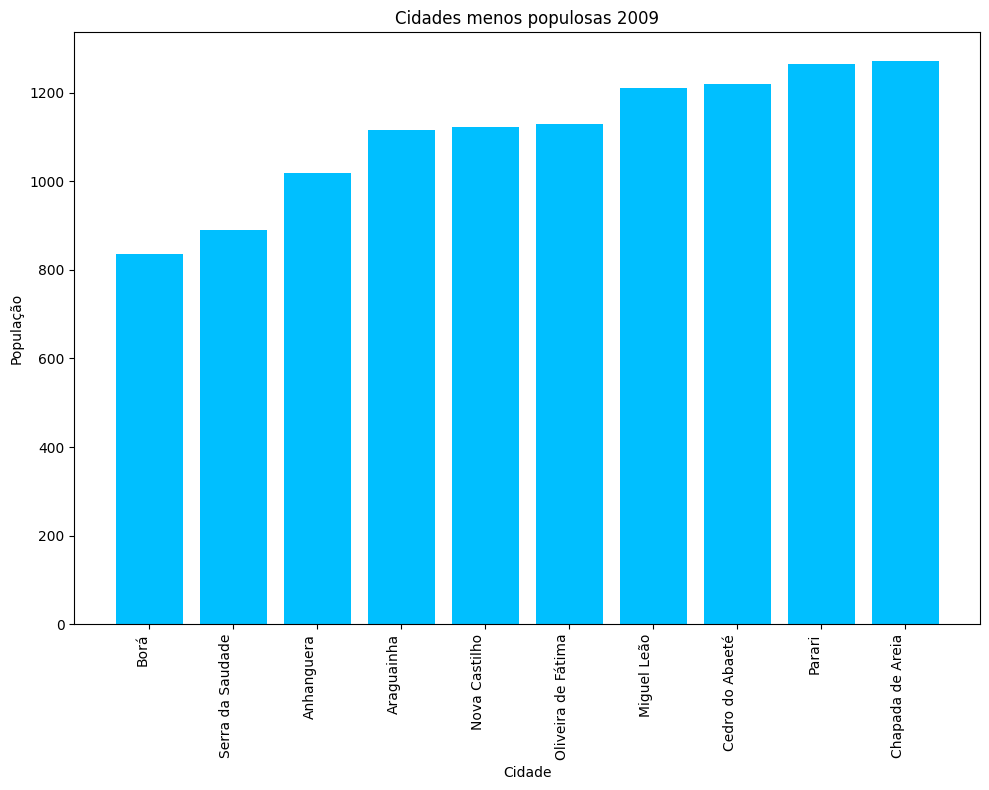

In [ ]:
#Fitras o dataframe com as 10 menores cidades
cidades_menos_populosas = brasil_df.sort_values('Pop_est_2009', ascending = True).head(10)

#criando um grafico
plt.figure(figsize=(10, 8))
plt.bar(cidades_menos_populosas['nome'], cidades_menos_populosas['Pop_est_2009'], color = 'deepskyblue')
plt.title('Cidades menos populosas 2009')
plt.xlabel('Cidade')
plt.ylabel('População')
#Rotacionar os titulos para melhor legibilidade
plt.xticks(rotation = 90, ha = 'right')
#Evitar que sobreponham um do outro
plt.tight_layout()

plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
import seaborn as sns

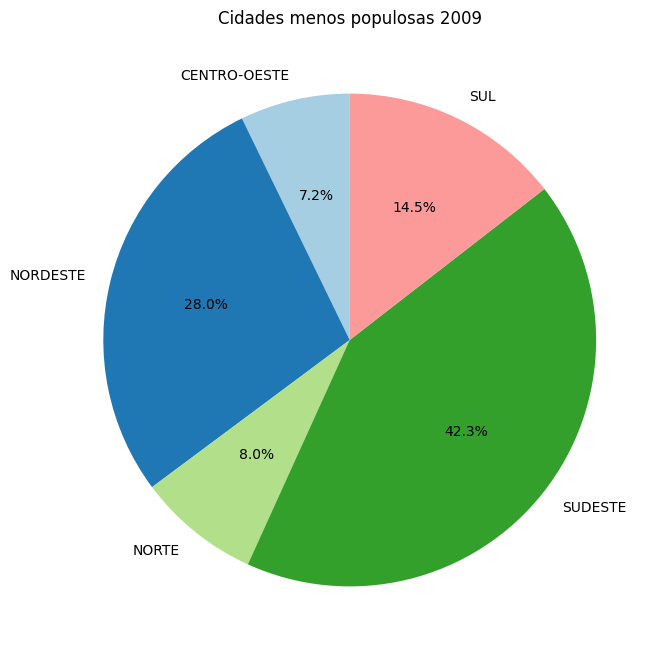

In [ ]:
#df filtrado com a proporção do população do Brasil
populacao_por_regiao = brasil_df.groupby('regiao')['Pop_est_2009'].sum().reset_index()

#Criando o grafico
plt.figure(figsize=(8, 8))
plt.title('Cidades menos populosas 2009')
#função autopct adiciona % no grafico
plt.pie(populacao_por_regiao['Pop_est_2009'], labels= populacao_por_regiao['regiao'], autopct = '%1.1f%%', startangle=90,colors = sns.color_palette('Paired'))

plt.show()